<a href="https://colab.research.google.com/github/chicks2014/sentiment_analysis/blob/main/Sentiment_analysis_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup kaggle API

In [ ]:
# from google.colab import files
# files.upload() #upload kaggle.json

# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

# !ls ~/.kaggle
# !chmod 600 /root/.kaggle/kaggle.json

## Import Important Packages

In [ ]:
pip install -q vaderSentiment

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.utils import shuffle
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import os
import pandas as pd
DATASET_ENCODING = "ISO-8859-1"

In [ ]:
tf.__version__

'2.8.2'

## Download and process Twitter Sentiment dataset

In [ ]:
# !kaggle datasets download -d kazanova/sentiment140

In [ ]:
df = pd.read_csv('train.csv')
df_test1 = pd.read_csv('test.csv')

In [ ]:
df.head()

,ID,Date,Time,Headline,News,Source,Field,Reaction/Sentiment,Polarity,Subjectivity
0,99248,2002-04-02,00:00:00,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,online_post_1637,Politics,0.330012,0.000000,0.000000
1,10423,2008-09-20,00:00:00,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",new_channel_175,Finance,0.517397,0.100000,0.200000
2,18828,2012-01-28,00:00:00,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",new_channel_175,Finance,0.439257,0.000000,0.041667
3,27788,2015-03-01,00:06:00,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,NaN,Finance,0.449774,-0.166667,0.166667
4,27789,2015-03-01,00:11:00,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,new_channel_1500,Finance,0.512907,0.133333,0.380556


In [ ]:
df.shape

(2406, 10)

In [ ]:
df= df.loc[:,['News', 'Subjectivity']]
df =  shuffle(df)
df,df_test = train_test_split(df,test_size=0.2)

In [ ]:
df.shape, df_test.shape

((1924, 2), (482, 2))

**for test**

In [ ]:
df_test1= df_test1.loc[:,['News', 'Subjectivity']]
df_test1 =  shuffle(df_test1)

In [ ]:
df_test1.head()

,News,Subjectivity
532,President Obama has some advice for Democrats ...,0.000000
1000,US President Barack Obama right) greets Palest...,0.535714
674,Drought hits Maha hard; political economy of c...,0.320833
778,"Confronted with a sluggish global economy, US ...",0.434375
24,&quot;Tell Jenkins that he looked pretty cool ...,0.825000


In [ ]:
df.head(5)

,News,Subjectivity
2041,Microsoft MSFT +0.00% hasn't been shy in touti...,0.750000
688,Microsoft’s stock finally returned to a nomina...,0.800000
1575,We rate MICROSOFT CORP (MSFT) a BUY. This is b...,0.545455
496,"BEIJING""""""China's economic slowdown has pummel...",0.220513
1361,The ongoing recession in Greek economy after l...,0.150000


In [ ]:
df.isna().sum()

News            37
Subjectivity     0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df_test.head()

,News,Subjectivity
717,Western governments praise Israel as a bastion...,0.325000
1485,"When Microsoft introduced Surface Pro, the tab...",0.666667
2004,WASHINGTON (AP) — When Obama heads overseas Sa...,0.332143
1164,SUMMARY: Government CTO Liam Maxwell sat down ...,0.304630
561,"The Jews are there, obviously, but so are the ...",0.500000


## Load Universal Sentence Encoder from TFhub

In [ ]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
embed(['hi samuels, this is our project']).numpy().shape

(1, 512)

In [ ]:
def vectorize(df):
    embeded_tweets = embed(df['News'].values.tolist())  #.numpy()
    targets = df.Subjectivity.values
    return embeded_tweets,targets

embeded_tweets,targets = vectorize(df)


## Model 

In [ ]:
model = Sequential()
model.add(Input(shape=(512,),dtype='float32'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(loss='mean_squared_error', 
              optimizer='adam',
              metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 73,985
Trainable params: 73,985
Non-trainable params: 0
_________________________________________________________________


## Train and evaluate

In [ ]:
num_epochs = 10
batch_size = 32   ## 2^x

history = model.fit(embeded_tweets, 
                    targets, 
                    epochs=num_epochs, 
                    validation_split=0.1, 
                    shuffle=True,
                    batch_size=batch_size)

Epoch 1/10
54/54 [==============================] - 1s 6ms/step - loss: 0.0672 - acc: 0.1952 - val_loss: 0.0462 - val_acc: 0.1852
Epoch 2/10
54/54 [==============================] - 0s 3ms/step - loss: 0.0475 - acc: 0.2005 - val_loss: 0.0439 - val_acc: 0.1905
Epoch 3/10
54/54 [==============================] - 0s 3ms/step - loss: 0.0406 - acc: 0.2028 - val_loss: 0.0442 - val_acc: 0.1905
Epoch 4/10
54/54 [==============================] - 0s 3ms/step - loss: 0.0320 - acc: 0.2105 - val_loss: 0.0456 - val_acc: 0.1799
Epoch 5/10
54/54 [==============================] - 0s 3ms/step - loss: 0.0251 - acc: 0.2140 - val_loss: 0.0468 - val_acc: 0.1799
Epoch 6/10
54/54 [==============================] - 0s 4ms/step - loss: 0.0168 - acc: 0.2181 - val_loss: 0.0512 - val_acc: 0.1799
Epoch 7/10
54/54 [==============================] - 0s 3ms/step - loss: 0.0104 - acc: 0.2193 - val_loss: 0.0470 - val_acc: 0.1852
Epoch 8/10
54/54 [==============================] - 0s 3ms/step - loss: 0.0067 - acc: 0.21

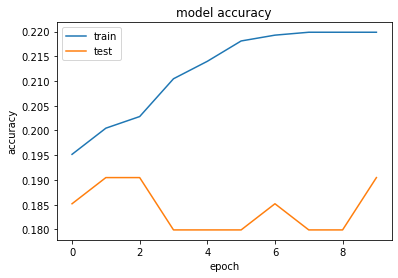

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


## Compare results


In [ ]:
from sklearn.metrics import mean_absolute_error

## Custom Model 

In [ ]:
df_test.isna().sum()

News            11
Subjectivity     0
dtype: int64

In [ ]:
df_test = df_test.dropna()

In [ ]:
embed_test,targets = vectorize(df_test)
predictions = model.predict(embed_test).astype(int)
mean_absolute_error(predictions,targets)*100

31.765355204991213

In [ ]:
df_test.iloc[1]

News            Leaders of the Group of 20 major economies (G2...
Subjectivity                                                  0.5
Name: 21, dtype: object

In [ ]:
test_text = "Obama Lays Wreath at Arlington National Cemetery"
embed_v = embed([test_text])
model.predict(embed_v)[0]

array([0.03537957], dtype=float32)

In [ ]:
df_test1.head()

,News,Subjectivity,predicition
532,President Obama has some advice for Democrats ...,0.000000,[0.21756764]
1000,US President Barack Obama right) greets Palest...,0.535714,[-0.14527605]
674,Drought hits Maha hard; political economy of c...,0.320833,[0.3631146]
778,"Confronted with a sluggish global economy, US ...",0.434375,[0.4749383]
24,&quot;Tell Jenkins that he looked pretty cool ...,0.825000,[0.77010095]


In [ ]:
def get_predictions(text):
  embed_v = embed([text])
  return float(model.predict(embed_v)[0])

In [ ]:
df_test1['predicition'] = df_test1.News.apply(lambda x: get_predictions(x))

In [ ]:
df_test1.head()

,News,Subjectivity,predicition
532,President Obama has some advice for Democrats ...,0.000000,0.217568
1000,US President Barack Obama right) greets Palest...,0.535714,-0.145276
674,Drought hits Maha hard; political economy of c...,0.320833,0.363115
778,"Confronted with a sluggish global economy, US ...",0.434375,0.474938
24,&quot;Tell Jenkins that he looked pretty cool ...,0.825000,0.770101


## Textblob

In [ ]:
!pip install -q textblob

In [ ]:
from textblob import TextBlob

analyzer = SentimentIntensityAnalyzer()

def text_sentiment(text):
    testimonial = TextBlob(text)
    return int(testimonial.sentiment.polarity>0.5)

predictions = df_test.News.map(lambda x :  text_sentiment(x))
mean_absolute_error(predictions,targets)

0.31209799649435654

In [ ]:
analyzer.polarity_scores("Obama Lays Wreath at Arlington National Cemetery")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

## Vader

In [ ]:
pip install -q vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def text_sentiment_vader(text):
 vs = analyzer.polarity_scores(text)
 return int(vs.get("compound")>0)
 
 predictions = df_test.News.map(lambda x : text_sentiment_vader(x))


In [ ]:
mean_absolute_error(predictions.values,targets)

## Flair

In [ ]:
!pip install -q flair

In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence
classifier = TextClassifier.load('en-sentiment')

def text_sentiment_flair(text):
  sentence = Sentence(text)
  classifier.predict(sentence)
  return np.round(sentence.labels[0].score)

predictions = df_test.News.map(lambda x : text_sentiment_flair(x))


In [ ]:
mean_absolute_error(predictions.values,targets)

In [ ]:
sentence=Sentence("Obama Lays Wreath at Arlington National Cemetery")
classifier.predict(sentence)
sentence.labels